In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

dataset = pd.read_csv(r"./testData.csv", header=None)
dataset = dataset.to_numpy()
clusterTest = dataset[:, 2]
data = dataset[:, :2]

m = data.shape[0]
print(f"The number of training examples is {m}")
print(f"The shape of the data is {data.shape}")
print(data)

The number of training examples is 1500
The shape of the data is (1500, 2)
[[ 0.89  6.35]
 [ 5.79 12.47]
 [ 5.43 11.14]
 ...
 [ 5.66 11.02]
 [ 5.58 11.36]
 [ 5.66 12.42]]


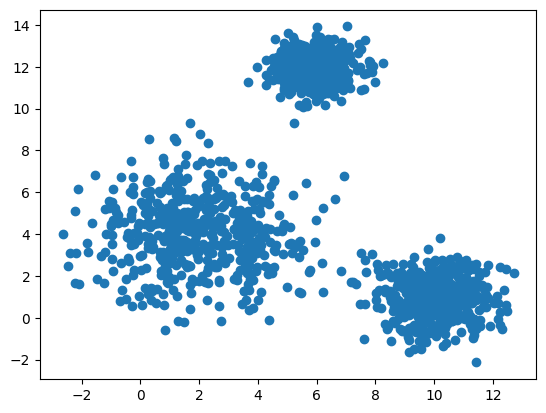

In [13]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [14]:
def squaredDistance(x1, y1, x2, y2):
    return np.square(x1 - x2) + np.square(y1 - y2)

def initCentroids(k):
    centroids = np.zeros((k, 2))
    for i in range(k):
        centroids[i] = data[np.random.choice(m)]
    return centroids

def calculateCost(centroids, clusterIdx, k):
    cost = 0
    for centroid in range(k):
        inCluster = data[clusterIdx == centroid]
        for point in range(len(inCluster)):
            x1, y1 = inCluster[point, 0], inCluster[point, 1]
            x2, y2 = centroids[centroid, 0], centroids[centroid, 1]
            cost += squaredDistance(x1, y1, x2, y2)
    return cost
        

def runKMeans(k):

    centroids = initCentroids(k)
    clusterIdx = np.zeros(m)
    J = []

    while True:
        oldCentroids = centroids

        # Finding out which centroid is the closest for all points
        for point in range(m):
            minDistance = float('inf')

            # Checking distance from each of the centroids
            for cluster in range(k):
                x1, y1 = data[point, 0], data[point, 1]
                x2, y2 = centroids[cluster, 0], centroids[cluster, 1]

                # Update if current centroid is closer
                if squaredDistance(x1, y1, x2, y2) <= minDistance:
                    minDistance = squaredDistance(x1, y1, x2, y2)
                    clusterIdx[point] = cluster
        
        for cluster in range(k):
            inCluster = data[clusterIdx == cluster]
            if len(inCluster) > 0:
                # axis=0 means column-wise
                centroids[cluster] = np.mean(inCluster, axis=0)
        
        J.append(calculateCost(centroids, clusterIdx, k))

        if oldCentroids.all() == centroids.all():
            break
    return centroids, clusterIdx, J

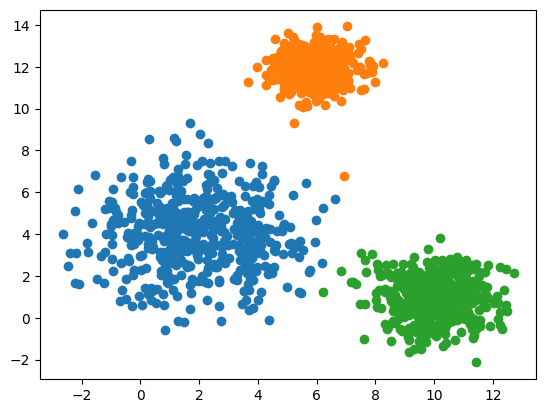

The cost of this is 4494.148714506412


In [19]:
numberOfClusters = 3
numberOfIterations = 69

minJ = [float('inf')]

for i in range(numberOfIterations):
    centroids, clusterIdx, J = runKMeans(numberOfClusters)
    if J[-1] < minJ[-1]:
        bestCentroids = centroids
        bestClusterIdx = clusterIdx
        minJ = J

for cluster in range(numberOfClusters):
    inCluster = data[bestClusterIdx == cluster]
    plt.scatter(inCluster[:, 0], inCluster[:, 1])
plt.show()

print(f"The cost of this is {minJ[-1]}")